In [65]:
import pandas as pd

In [31]:
column = ["Maria", "Batman", "Spongebob"]
titled_column = {"name": column,
                "height": [1.67, 1.9, 0.25],
                "weight": [54, 100, 1]
                        }

data = pd.DataFrame(titled_column)
select_row = data.iloc[1]
print(data)

        name  height  weight
0      Maria    1.67      54
1     Batman    1.90     100
2  Spongebob    0.25       1


In [3]:
print(data["weight"])

0     54
1    100
2      1
Name: weight, dtype: int64


In [4]:
print(data["weight"][1])

100


In [5]:
print(select_row)

name      Batman
height       1.9
weight       100
Name: 1, dtype: object


In [6]:
print(data.iloc[1]["weight"])

100


## manipulate dataframe values

In [35]:
# weight/(height**2)
bmi = []
for i in range(len(data)):
    bmi_score = data["weight"][i]/(data["height"][i]**2)
    bmi.append(bmi_score)
data["bmi"] = bmi

In [8]:
data

,name,height,weight,bmi
0,Maria,1.67,54,19.362473
1,Batman,1.90,100,27.700831
2,Spongebob,0.25,1,16.000000


## Save Dataframe in a file

Attenzione! Il comando contiene csv ma se usiamo il formato txt si produrrà un file TXT!

In [ ]:
data.to_csv("bmi.csv", index=False, sep="\t")

In [ ]:
new_dataframe = pd.read_csv("bmi.csv", sep="\t") # specificare il sep se non default

In [ ]:
new_dataframe

In [ ]:
import sqlite3
connection = sqlite3.connect("gta.db") 

`gta_data = pd.read_sql("select * from  tabella", connection)`

In [9]:
data.head(1) # tail per le utilme righe

,name,height,weight,bmi
0,Maria,1.67,54,19.362473


In [10]:
data[data["name"] == "Batman"]

,name,height,weight,bmi
1,Batman,1.9,100,27.700831


In [11]:
data.replace(100, 110) # sostituzione in place, originale non viene toccato!

,name,height,weight,bmi
0,Maria,1.67,54,19.362473
1,Batman,1.90,110,27.700831
2,Spongebob,0.25,1,16.000000


In [12]:
data.drop("bmi", axis=1) # sempre in place, originale non viene toccato

,name,height,weight
0,Maria,1.67,54
1,Batman,1.90,100
2,Spongebob,0.25,1


## Delete column in place

In [13]:
data[["name", "weight"]]

,name,weight
0,Maria,54
1,Batman,100
2,Spongebob,1


In [38]:
data.iloc[0:2]

,name,height,weight,bmi
0,Maria,1.67,54,19.362473
1,Batman,1.90,100,27.700831


## New row

In [42]:
new_row = pd.DataFrame({"name":["eleonora"],"height": [160],"weight": [50]})
data = pd.concat([data, new_row], ignore_index=True, axis=0).fillna(0)

In [44]:
data

,name,height,weight,bmi
0,Maria,1.67,54,19.362473
1,Batman,1.90,100,27.700831
2,Spongebob,0.25,1,16.000000
3,eleonora,160.00,50,0.001953
4,eleonora,160.00,50,0.000000
5,eleonora,160.00,50,0.000000


In [52]:
data.drop_duplicates(subset=["name"]) # in place originale NON modificato


,name,height,weight,bmi
0,Maria,1.67,54,19.362473
1,Batman,1.90,100,27.700831
2,Spongebob,0.25,1,16.000000
3,eleonora,160.00,50,0.001953


## Aggiungiamo grafico usando libreria pandas

In [66]:
y = {"f(x)":[2,10,6,8]}
x = [1,2,3,4]

<AxesSubplot:title={'center':'BicherTheOne'}, xlabel='variabile x', ylabel='variabile y'>

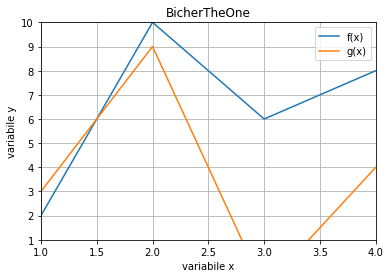

In [80]:
graph = pd.DataFrame(y,x)
graph.plot(kind="line", grid=True, title="BicherTheOne", xlim=(1,4), ylim=(1,10), ylabel="variabile y", xlabel="variabile x")


In [74]:
y = {"f(x)":[2,10,6,8], "g(x)":[3,9,-1,4]}
x = [1,2,3,4]

<AxesSubplot:title={'center':'BicherTheOne'}, xlabel='variabile x', ylabel='variabile y'>

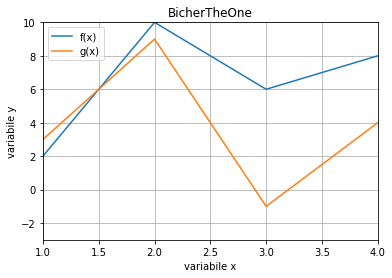

In [83]:
graph = pd.DataFrame(y, x)
graph.plot(kind="line", grid=True, title="BicherTheOne",ylabel="variabile y", xlabel="variabile x", xlim=(1,4), ylim=(-3,10))


## Web Database Scraping MechanicalSoup - semplice senza aprire browser

In [4]:
import mechanicalsoup
import sqlite3

In [25]:
URL = ("https://en.wikipedia.org/wiki/Comparison_of_Linux_distributions")

In [26]:
browser = mechanicalsoup.StatefulBrowser()
browser.open(URL)

<Response [200]>

In [27]:
th = browser.page.find_all("th", attrs={"class":"table-rh"} )
distribution = [value.text.replace("\n","") for value in th]

In [38]:
print(distribution[0:98]) # distribution è una LISTA

['AlmaLinux', 'Alpine Linux', 'ALT Linux', 'antiX', 'ArchBang', 'Arch Linux', 'BLAG', 'Bodhi Linux', 'Canaima', 'CentOS', 'Chakra', 'Chrome OS', 'Clear Linux OS', 'ClearOS', 'CrunchBang Linux', 'Damn Small Linux', 'Debian', 'Debian Edu', 'Devuan', 'Deepin', 'Dragora GNU/Linux-Libre', 'dyne:bolic', 'Elementary OS', 'ELinOS', 'Emdebian Grip', 'EndeavourOS', 'Fedora Linux', 'Freespire', 'Gentoo Linux', 'Guix System', 'gNewSense', 'Grml', 'Hyperbola GNU/Linux-libre', 'Kali Linux', 'Knoppix', 'Kodibuntu', 'Korora', 'LibreCMC', 'Linspire', 'Linux Mint', 'Linux Lite', 'Mageia', 'Mandriva Linux', 'Manjaro Linux', 'MEPIS', 'MIRACLE LINUX', 'Musix GNU+Linux', 'Netrunner', 'NixOS', 'Novell Open Enterprise Server', 'OpenELEC', 'openSUSE', 'OpenWrt', 'OpenMandriva Lx', 'Oracle Linux', 'Parabola GNU/Linux-libre', 'Pardus', 'Parrot OS', 'Parsix', 'Parted Magic', 'PCLinuxOS', 'Pop! OS', 'Pentoo', 'Porteus', 'Puppy Linux', 'PureOS', 'Qubes OS', 'Red Hat Enterprise Linux (RHEL)', 'Red Hat Linux', 'Rocks

In [36]:
distribution.index("Zorin OS")

97

In [41]:
distribution = distribution[:98]

In [53]:
td = browser.page.find_all("td")
columns = [value.text.replace("\n", "") for value in td]

In [56]:
columns = columns[6:1051]

In [57]:
# select every 11th item
columns[::11]


['Alpine Linux Team',
 'ALT Linux Team, ALT Linux LLC',
 'Anticapitalista',
 'Stan McLaren',
 'dev team',
 'Brixton Linux Action Group',
 'Bodhi Linux Team',
 'CANTV / CNTI / CENTIDEL / Edelca / VIT / FUNDACITE / Free software community',
 'CentOS Project',
 'The Chakra Project Team',
 'Google',
 'Intel',
 'ClearFoundation',
 'Philip Newborough',
 'dev team',
 'Debian Project',
 'Debian Project',
 'The "Veteran Unix Admins" (VUA)',
 'Wuhan Deepin Technology Co., Ltd.',
 'Matias A. Fonzo',
 'Jaromilx',
 'elementary LLC',
 'SYSGO',
 'Embedded Debian Project',
 'EndeavourOS',
 'Fedora Project',
 'PC/OpenSystems LLC',
 'Gentoo Foundation, Inc.',
 'Ludovic Courtès, Ricardo Wurmus, the Guix community',
 'Sam Geeraerts with sponsorship from the FSF',
 'The Grml Team',
 'Hyperbola Founders',
 'Offensive Security',
 'dev team',
 'Team Kodi',
 'Dev Team',
 'LibreCMC team',
 'Linspire, Inc.',
 'dev team',
 'Linux Lite Team',
 'mageia.org',
 'Mandriva S.A.',
 'dev team',
 'MEPIS LLC',
 'Cybertrust

In [59]:
column_names = [
    "Founder",
    "Initial_Release_Year",
    "Current_Stable_Version",
    "Security_Updates",
    "Release_Date",
    "System_Distribution_Commitment",
    "Forked_From",
    "Target_Audience",
    "Cost",
    "Status"
]

In [63]:
dictionary = {"Distribution": distribution}
for idx, key in enumerate(column_names):
    dictionary[key] = column_names[idx:][::11]

In [ ]:
# df = pd.DataFrame(data=dictionary) ERRORE per colonne cambiate nel tempo rispetto al video

```
connection = sqlite3.connect("mio_database.db")
cursor = connection.cursor()
cursor.execute("create table linux (Distribution, " + ",".join(column_names) + ")")
for i in range(len(df)):
    cursor.execute("insert into linux values(?,?,?,?,?,?,?,?,?,?,?)", df.iloc[idx] )

connection.commit() #salva i dati nel DATABASE
connection.close()
```